In [ ]:
#Importações
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Montando o drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lendo os dados
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv', encoding='latin1')

#Limpeza e Tratamento dos dados

In [ ]:
#Visualizando os dados
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Visualizar os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Tratar os tipos de dados
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'], errors='coerce')
dados['CustomerID'] = dados['CustomerID'].astype(str)

In [ ]:
#Removendo dados duplicados
dados = dados.drop_duplicates()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
#Preencher linhas vazias
dados['Description'] = dados['Description'].fillna('Desconhecido')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
#Criando coluna de faturamento
dados['Faturamento'] = dados['Quantity'] * dados['UnitPrice']
dados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Faturamento
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#Análise dos dados

In [ ]:
#Visualizar os dados
dados


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Faturamento,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12


In [ ]:
#Quais os 10 produtos mais vendidos?
Top_produtos = dados.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
Top_produtos

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30631
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


In [ ]:
#Qual a receita total por mês?
dados['Month'] = dados['InvoiceDate'].dt.month
receita_mensal = dados.groupby('Month')['Faturamento'].sum()
receita_mensal.round(2)

,Faturamento
Month,
1,558448.56
2,497026.41
3,682013.98
4,492367.84
5,722094.10
6,689977.23
7,680156.99
8,681386.46
9,1017596.68


In [ ]:
#Qual o cliente que mais gastou?
maior_cliente = dados.groupby('CustomerID')['Faturamento'].sum().sort_values(ascending=False).head(3)
maior_cliente

,Faturamento
CustomerID,
nan,1447487.53
14646.0,279489.02
18102.0,256438.49


In [ ]:
#Qual país com maior faturamento?
pais_maior_fat = dados.groupby('Country')['Faturamento'].sum().sort_values(ascending=False)
pais_maior_fat

,Faturamento
Country,
United Kingdom,8167128.184
Netherlands,284661.540
EIRE,262993.380
Germany,221509.470
France,197317.110
Australia,137009.770
Switzerland,56363.050
Spain,54756.030
Belgium,40910.960


#Gráficos

In [ ]:
#Define o estilo visual do grafico
sns.set_style('whitegrid')

/tmp/ipython-input-3017827188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receita_mensal.index, y=receita_mensal.values, palette='viridis')


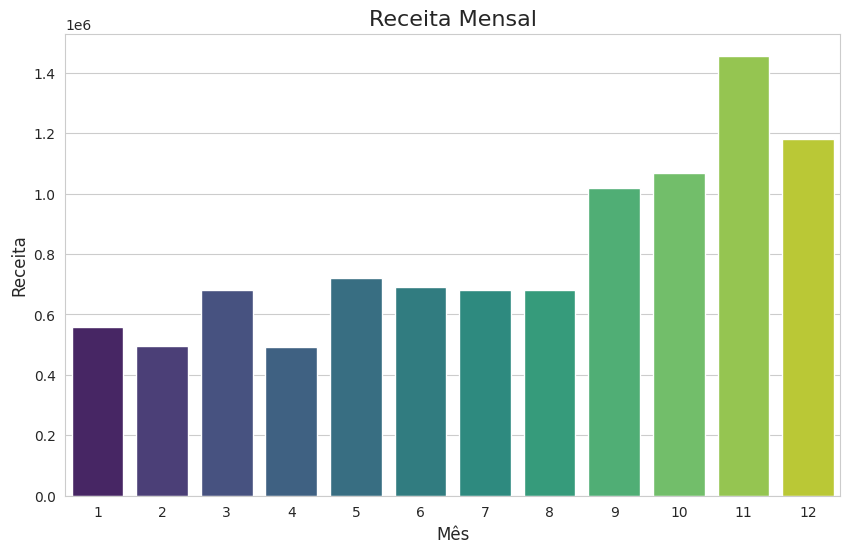

In [ ]:
#Cria o gráfico de barras
plt.figure(figsize=(10,6)) #define o tamanho da figura
sns.barplot(x=receita_mensal.index, y=receita_mensal.values, palette='viridis')
#Adiciona titulos e rotulos
plt.title('Receita Mensal', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Receita', fontsize=12)
#Exibe o grafico
plt.show()